In [1]:
import numpy as np


In [2]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.arange(1, 11).reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
# 确定合适的alpha需要绘制岭迹线

X = 1/(np.arange(0, 10)+np.arange(1, 11).reshape(-1 ,1))
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [7]:
X.shape

(10, 10)

In [8]:
# 目标值y
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
from sklearn.linear_model import Ridge

In [10]:
# 设X和y之间存在一定关系,线性关系 f(X) = w1 * x1 + w2 * x2 + w3 * x3 ... +b
ridge = Ridge(fit_intercept=True)
ridge.fit(X, y)

# 解方程,最主要的是10个系数,和目标值之间的权重关系(系数)
ridge.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
ridge.intercept_

1.0

In [23]:
# 不给截距
ridge = Ridge(fit_intercept=False)

# linespace等差数列,数据比较大的时候可以划分
# 数据很小就不可以,因为划分不均匀
alphas = np.linspace(1e-10, 1e-2, 200)
alphas

array([1.00000000e-10, 5.02513558e-05, 1.00502612e-04, 1.50753867e-04,
       2.01005123e-04, 2.51256379e-04, 3.01507635e-04, 3.51758890e-04,
       4.02010146e-04, 4.52261402e-04, 5.02512658e-04, 5.52763914e-04,
       6.03015169e-04, 6.53266425e-04, 7.03517681e-04, 7.53768937e-04,
       8.04020192e-04, 8.54271448e-04, 9.04522704e-04, 9.54773960e-04,
       1.00502522e-03, 1.05527647e-03, 1.10552773e-03, 1.15577898e-03,
       1.20603024e-03, 1.25628149e-03, 1.30653275e-03, 1.35678401e-03,
       1.40703526e-03, 1.45728652e-03, 1.50753777e-03, 1.55778903e-03,
       1.60804028e-03, 1.65829154e-03, 1.70854280e-03, 1.75879405e-03,
       1.80904531e-03, 1.85929656e-03, 1.90954782e-03, 1.95979908e-03,
       2.01005033e-03, 2.06030159e-03, 2.11055284e-03, 2.16080410e-03,
       2.21105535e-03, 2.26130661e-03, 2.31155787e-03, 2.36180912e-03,
       2.41206038e-03, 2.46231163e-03, 2.51256289e-03, 2.56281414e-03,
       2.61306540e-03, 2.66331666e-03, 2.71356791e-03, 2.76381917e-03,
      

In [24]:
alphas = np.logspace(-10, -2,200)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

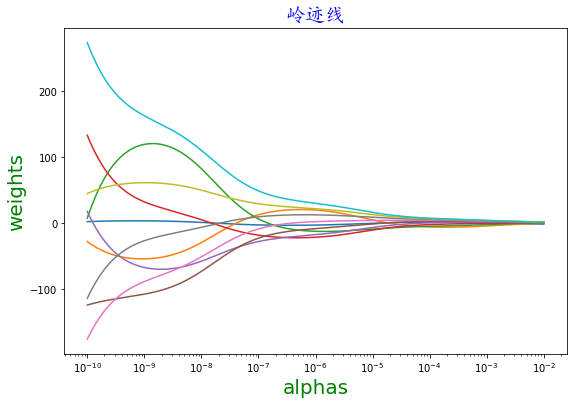

In [27]:
weights = []

for a in alphas:
    
    # 设置alpha
    ridge.set_params(alpha = a)
    
    ridge.fit(X, y)
    
    weights.append(ridge.coef_)
    
# 绘制图形
# 岭迹线横坐标alphas, 纵坐标使用weights
plt.figure(figsize=(9, 6))
plt.plot(alphas, weights)

plt.xlabel('alphas', fontsize=20, color='g')
plt.ylabel('weights', fontsize=20, color='g')
plt.title('岭迹线', fontproperties='KaiTi', fontsize=20, color='b')
# 缩放
_ = plt.xscale('log')